In [16]:
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go

In [17]:
nutrients = pd.read_csv("nutrients_csvfile.csv")
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,38.0,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0.0,0.0,52.0,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4.0,0.0,13.0,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18.0,0.0,24.0,Dairy products
4,Fortified milk,6 cups,999,999,89,42,23.0,1.4,119.0,Dairy products


In [18]:
# nutrients=nutrients.replace('t',np.nan,regex=True).fillna(0)
# nutrients=nutrients.replace('a',np.nan,regex=True).fillna(0)
# nutrients=nutrients.replace(',',np.nan,regex=True).fillna(0)
nutrients=nutrients.replace('',np.nan,regex=True).fillna(0)

nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,38.0,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0.0,0.0,52.0,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4.0,0.0,13.0,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18.0,0.0,24.0,Dairy products
4,Fortified milk,6 cups,999,999,89,42,23.0,1.4,119.0,Dairy products


In [19]:
nutrients['Grams'] = pd.to_numeric(nutrients['Grams'], errors='coerce')
nutrients['Calories'] = pd.to_numeric(nutrients['Calories'], errors='coerce')
nutrients['Protein'] = pd.to_numeric(nutrients['Protein'], errors='coerce')
nutrients['Fat'] = pd.to_numeric(nutrients['Fat'], errors='coerce')
nutrients['Sat.Fat'] = pd.to_numeric(nutrients['Sat.Fat'], errors='coerce')
nutrients['Fiber'] = pd.to_numeric(nutrients['Fiber'], errors='coerce')
nutrients['Carbs']=pd.to_numeric(nutrients['Carbs'], errors='coerce')

In [20]:
nutrients.dtypes

Food         object
Measure      object
Grams         int64
Calories      int64
Protein       int64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

In [21]:
print(nutrients.isnull().any())
print('-'*245)
print(nutrients.describe())
print('-'*245)

Food        False
Measure     False
Grams       False
Calories    False
Protein     False
Fat         False
Sat.Fat     False
Fiber       False
Carbs       False
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
            Grams    Calories     Protein         Fat     Sat.Fat       Fiber  \
count  332.000000  332.000000  332.000000  332.000000  332.000000  332.000000   
mean   142.560241  187.108434    8.304217    8.237952    6.084337    2.031958   
std    128.992632  173.702685   16.830798   18.998346   17.550070   14.841154   
min     11.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     60.000000   75.000000    1.000000    0.000000    0.000000    0.000000   
50%    108.000000  133.500000    3.000000    1.000000    0.000000    0.20000

In [22]:
nutrients=nutrients.dropna()
nutrients.shape

(332, 10)

C:\Users\gaurav shresth\AppData\Local\Temp\ipykernel_11696\3499221580.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




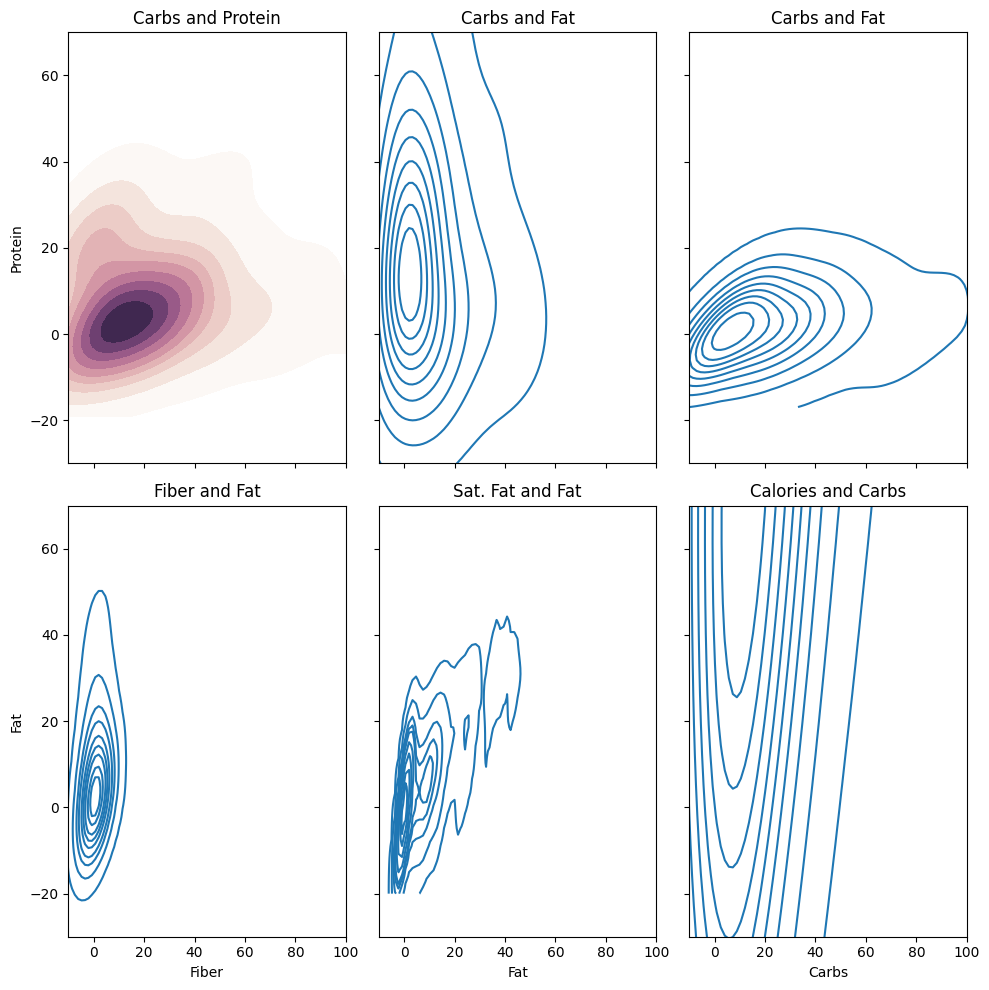

In [23]:
f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Protein'],
            cmap=cmap, shade=True, ax=axes[0, 0])
axes[0, 0].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Protein')

cmap = sns.cubehelix_palette(start=0.25, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Fat'], y=nutrients['Carbs'], ax=axes[0, 1])
axes[0, 1].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fat')

cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Fiber'], ax=axes[0, 2])
axes[0, 2].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fat')

cmap = sns.cubehelix_palette(start=0.45, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Fiber'], y=nutrients['Fat'], ax=axes[1, 0])
axes[1, 0].set(xlim=(-10, 50), ylim=(-30, 70), title='Fiber and Fat')

cmap = sns.cubehelix_palette(start=0.56, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Fat'], y=nutrients['Sat.Fat'], ax=axes[1, 1])
axes[1, 1].set(xlim=(-10, 50), ylim=(-30, 70), title='Sat. Fat and Fat')

cmap = sns.cubehelix_palette(start=0.68, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Calories'], ax=axes[1, 2])
axes[1, 2].set(xlim=(-10, 100), ylim=(-30, 70), title='Calories and Carbs')

f.tight_layout()


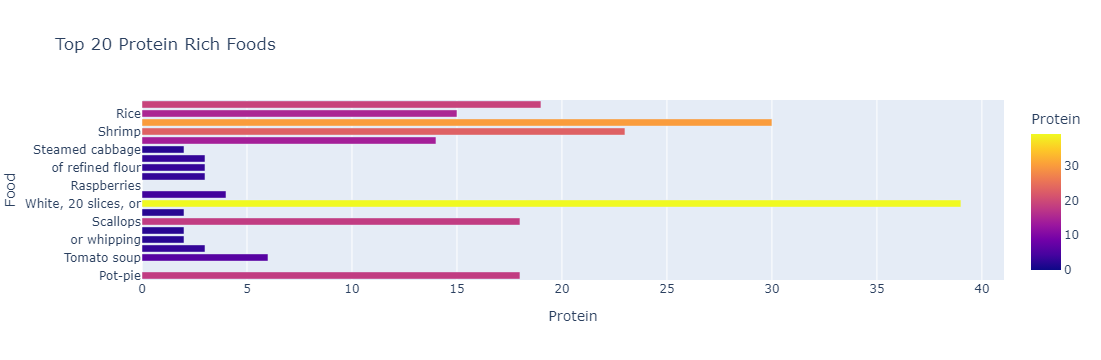

In [37]:
# protein_rich = nutrients.sort_values(by='Protein', ascending=False)
# top_20=protein_rich.head(20)
# fig = px.bar(top_20, x='Food', y='Protein', color='Protein', title=' Top 20 protein rich foods')
# fig.show()
# import plotly.express as px

# protein_rich = nutrients.sort_values(by='Protein', ascending=False)
# top_20 = protein_rich.head(20)

# fig = px.bar(top_20, y='Food', x='Protein', color='Protein', orientation='h', title='Top 20 Protein Rich Foods')
# fig.show()
import plotly.express as px
import numpy as np

protein_rich = nutrients.copy().sort_values(by='Protein', ascending=False)
shuffled_index = np.random.permutation(protein_rich.index)
protein_rich = protein_rich.reindex(shuffled_index).head(20)

fig = px.bar(protein_rich, y='Food', x='Protein', color='Protein', orientation='h', title='Top 20 Protein Rich Foods')
fig.show()



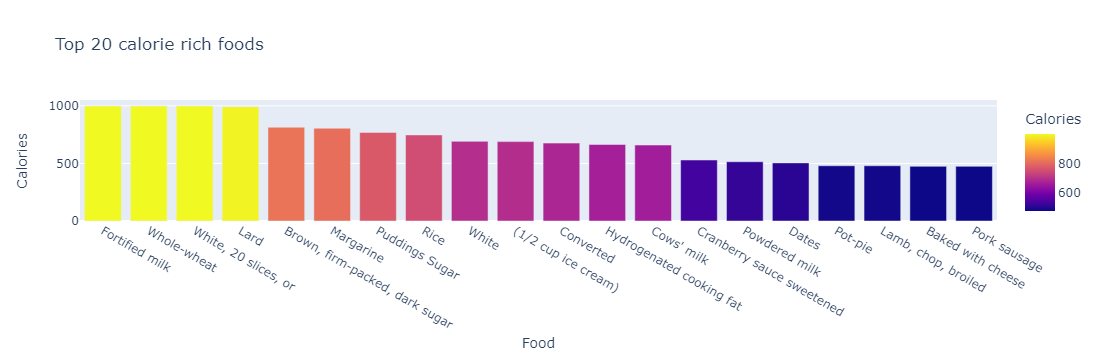

In [25]:
cals= nutrients.sort_values(by='Calories', ascending= False)
top_20_cals=cals.head(20)
fig = px.bar(top_20_cals, x='Food', y='Calories',
             color='Calories', title=' Top 20 calorie rich foods')
fig.show()

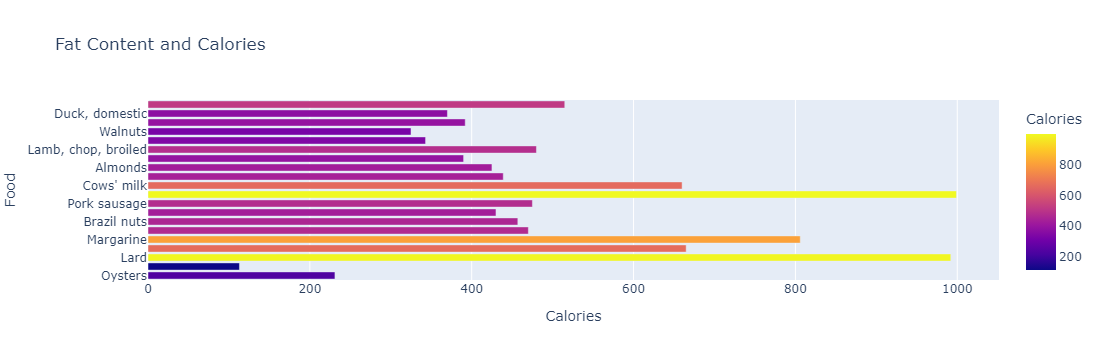

In [39]:
# fats= nutrients.sort_values(by='Fat', ascending= False)
# top_20_fat=fats.head(20)
# fig = px.bar(top_20_fat, x='Food', y='Calories', color='Calories', title=' Fat Content and Calories')
# fig.show()

import plotly.express as px

fats = nutrients.sort_values(by='Fat', ascending=False)
top_20_fat = fats.head(20)

fig = px.bar(top_20_fat, y='Food', x='Calories', color='Calories', orientation='h', title='Fat Content and Calories')
fig.show()


In [27]:
category_dist = nutrients.groupby(['Category']).sum()
category_dist.drop(['Measure'], axis=1, inplace=True)
category_dist['C/G'] = category_dist.Calories.div(category_dist.Grams)
category_dist = category_dist.sort_values(by='C/G', ascending=False)
category_dist=category_dist
category_dist

,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,C/G
Category,,,,,,,,,
"Fats, Oils, Shortenings",YolksButterHydrogenated cooking fatLardMargari...,569,3416,120,505,410.0,117.00,121.0,6.003515
Seeds and Nuts,Almondsroasted and saltedBrazil nutsCashewscoc...,682,4089,120,368,232.0,18.60,140.0,5.995601
"Jams, Jellies","HoneypreservesJelliesMolassesCane SyrupBrown, ...",422,1345,0,0,0.0,8.00,345.0,3.187204
"Meat, Poultry",Salt porkBaconBeefHamburgerGround leanRoast be...,2784,7999,549,575,427.0,0.00,57.3,2.873204
"Desserts, sweets",Apple bettyBread puddingCakesChocolate fudgeCu...,2958,6608,78,163,150.0,20.50,1184.0,2.233942
"Breads, cereals, fastfood,grains","BiscuitsBran flakesBread, cracked wheatRyeWhit...",5253,11594,403,207,99.0,115.91,2059.0,2.207120
"Fish, Seafood",ClamsCodCrab meatFish sticks friedFlounderHadd...,1892,2912,606,347,252.0,235.00,263.0,1.539112
Dairy products,"Cows' milkMilk skimButtermilkEvaporated, undil...",6992,8060,503,396,324.0,4.40,651.0,1.152746
Fruits A-F,"Watercress stems, rawApple juice cannedApple v...",3844,3328,29,20,12.0,33.50,812.0,0.865765


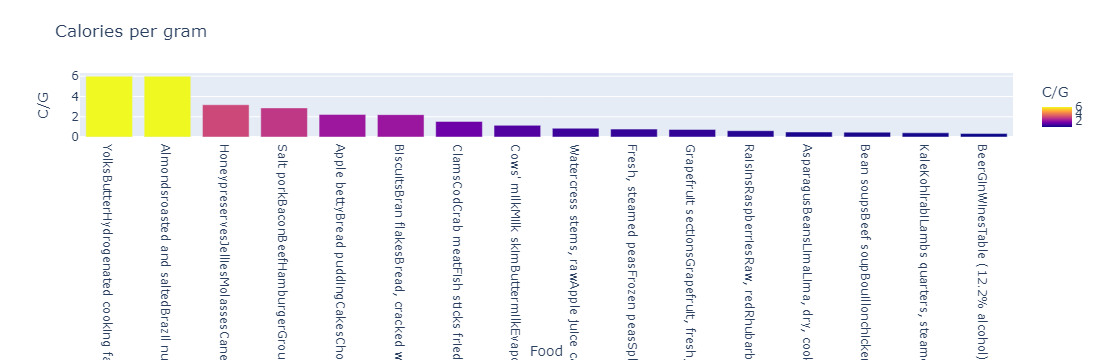

In [28]:
fats= category_dist.sort_values(by='C/G', ascending= False)
top_20_fat=fats.head(20)
fig = px.bar(top_20_fat, x='Food', y='C/G', color='C/G', title='Calories per gram')
fig.show()

In [29]:
def categorize_food(calories):
    
    low_threshold = 2
    high_threshold = 4
    
    if calories < low_threshold:
        return 'Low'
    elif low_threshold <= calories < high_threshold:
        return 'Mid'
    else:
        return 'High'

category_dist['Category'] = category_dist['C/G'].apply(categorize_food)
category_dist

,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,C/G,Category
Category,,,,,,,,,,
"Fats, Oils, Shortenings",YolksButterHydrogenated cooking fatLardMargari...,569,3416,120,505,410.0,117.00,121.0,6.003515,High
Seeds and Nuts,Almondsroasted and saltedBrazil nutsCashewscoc...,682,4089,120,368,232.0,18.60,140.0,5.995601,High
"Jams, Jellies","HoneypreservesJelliesMolassesCane SyrupBrown, ...",422,1345,0,0,0.0,8.00,345.0,3.187204,Mid
"Meat, Poultry",Salt porkBaconBeefHamburgerGround leanRoast be...,2784,7999,549,575,427.0,0.00,57.3,2.873204,Mid
"Desserts, sweets",Apple bettyBread puddingCakesChocolate fudgeCu...,2958,6608,78,163,150.0,20.50,1184.0,2.233942,Mid
"Breads, cereals, fastfood,grains","BiscuitsBran flakesBread, cracked wheatRyeWhit...",5253,11594,403,207,99.0,115.91,2059.0,2.207120,Mid
"Fish, Seafood",ClamsCodCrab meatFish sticks friedFlounderHadd...,1892,2912,606,347,252.0,235.00,263.0,1.539112,Low
Dairy products,"Cows' milkMilk skimButtermilkEvaporated, undil...",6992,8060,503,396,324.0,4.40,651.0,1.152746,Low
Fruits A-F,"Watercress stems, rawApple juice cannedApple v...",3844,3328,29,20,12.0,33.50,812.0,0.865765,Low


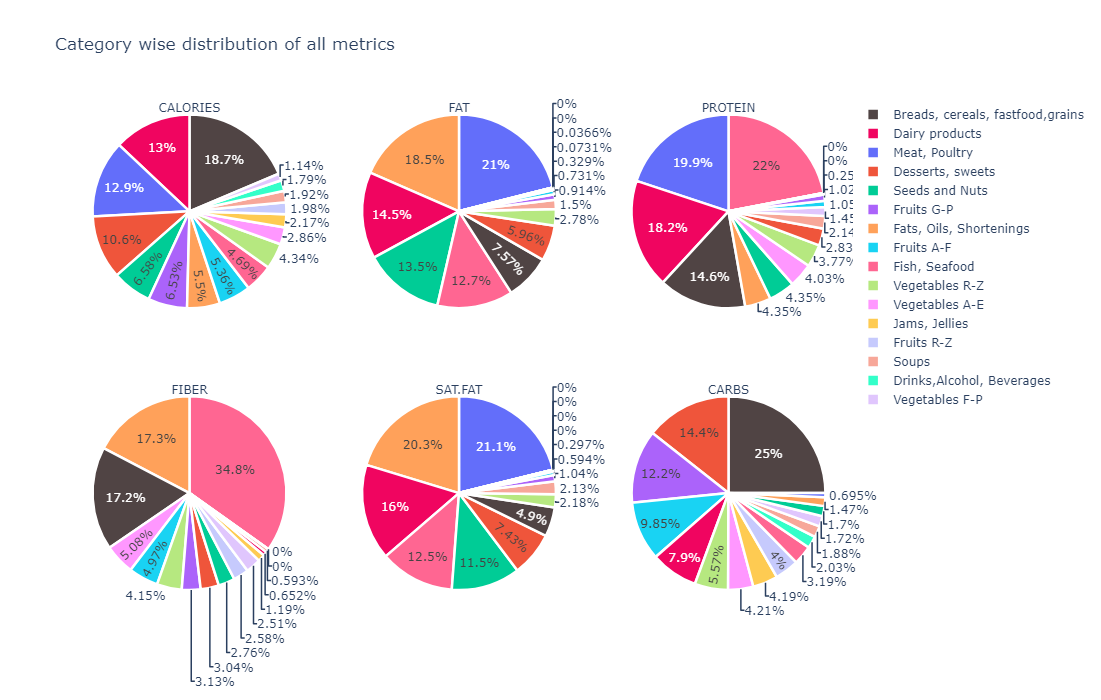

In [30]:
category_dist=nutrients.groupby(['Category']).sum()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

fig.show()